In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import torch
import torch.utils.data
import torchvision
# from torch.utils.tensorboard import SummaryWriter
from tqdm.notebook import tqdm
from icecream import ic

In [31]:
import sys
path = r"../Data/raw"
image_addr_list = os.listdir(path)

#### Read Sample Image

ic| img.shape: (674, 1000, 3)
ic| clipped_img.shape: (200, 750, 3)


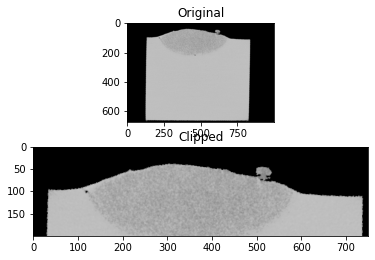

In [79]:
sample_addr = image_addr_list[100]
full_path = os.path.join(path, sample_addr)
imgobj = Image.open(full_path).convert('RGB')
# Show original images
img = np.asarray(imgobj)
ic(img.shape)
# Clip images
clipped_img = img[0:200,100:850]
ic(clipped_img.shape)
# Plot results
titles = ['Original', 'Clipped']
for idx, img in enumerate([img, clipped_img]):
    plt.subplot(2, 1,idx+1), plt.imshow(img,'gray',vmin=0,vmax=255)
    plt.title(titles[idx])

#### Clip all images

In [35]:
ic(len(image_addr_list))
process = False
if process:
    for i in tqdm(image_addr_list):
        full_path = os.path.join(path, i)
        img = Image.open(full_path).convert('RGB')
        img_array = np.asarray(img)
        img_ = Image.fromarray(img_array[0:250,120:850], 'RGB')
        img_.save('../Data/clipped/' + i)

ic| len(image_addr_list): 4046


  0%|          | 0/4046 [00:00<?, ?it/s]

In [40]:
assert len(os.listdir("../Data/clipped/")) == len(image_addr_list)

#### Denoising

##### Denoise a single sample image

In [80]:
import cv2 as cv

ic| clipped_img.shape: (200, 750, 3)
ic| thresh1.shape: (200, 750)
ic| ret: 0.0


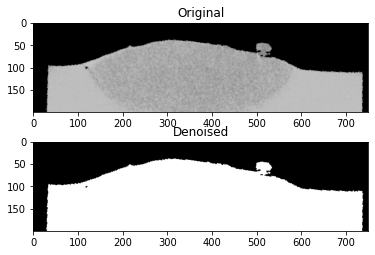

In [82]:
# Original images
ic(clipped_img.shape)
# plt.imshow(clipped_img)
# Thresholding the original images
bi_img = cv.cvtColor(clipped_img, cv.COLOR_BGR2GRAY)
ret, thresh1 = cv.threshold(bi_img, 255, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
ic(thresh1.shape)
ic(ret)
# Plot results
titles = ['Original', 'Denoised']
for idx, img in enumerate([clipped_img, thresh1]):
    plt.subplot(2, 1,idx+1), plt.imshow(img,'gray',vmin=0,vmax=255)
    plt.title(titles[idx])

##### Denoising all images

In [84]:
process=True
if process:
    for i in tqdm(image_addr_list):
        full_path = os.path.join(path, i)
        img = Image.open(full_path).convert('RGB')
        img_array = np.asarray(img)
        # Clip
        img_ = Image.fromarray(img_array[0:250,120:850], 'RGB')
        img_ = cv.cvtColor(np.asarray(img_), cv.COLOR_BGR2GRAY)
        # Denoise
        ret, thresh1 = cv.threshold(img_, 255, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) 
        Image.fromarray(thresh1).save('../Data/processed/' + i)
assert len(os.listdir("../Data/processed/")) == len(image_addr_list)

  0%|          | 0/4046 [00:00<?, ?it/s]